In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

In [51]:
xgrid, ygrid = torch.meshgrid(torch.arange(0, 10, 0.5), torch.arange(0, 10, 0.5))
grid = torch.cat((xgrid.flatten().unsqueeze(0), ygrid.flatten().unsqueeze(0)), dim=0)
grid.shape

torch.Size([2, 400])

In [62]:
crds0 = torch.rand((4, 2)) * 19
crds = crds0.clone()

In [63]:
crds = crds0.clone()

In [64]:
for i in range(3):
    crds = torch.cat((crds, crds0 + torch.normal(0.8, 0.8, (4, 2)) * torch.sign(torch.randint(-1, 1, (4,2)))) , dim=0)

In [65]:
crd_around = grid.T[torch.any(torch.cdist(grid.T, crds) < 1.5, dim=1)]
crd_around_idx = torch.nonzero(torch.any(torch.cdist(grid.T, crds) < 1.5, dim=1))
A = (torch.cdist(crd_around, crd_around, p=1) <= 1.0).double()

In [83]:
labels = torch.zeros(grid.shape[1])
labels[crd_around_idx] = 1
# print(torch.all(crd_around_idx == torch.nonzero(labels)))

In [89]:
n_components, labeled_components = connected_components(csgraph=csr_matrix(A), directed=False, return_labels=True)
labeled_components


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3], dtype=int32)

In [90]:
labels_unique, labels_count = torch.unique(torch.tensor(labeled_components), return_counts=True)
labels_count_good = (labels_count > 10)

In [72]:
labels_count_good.shape

torch.Size([4])

In [91]:
crd_around_cleaned = grid.T[crd_around_idx[labels_count_good[labeled_components]].squeeze()]

In [92]:
labels_cleaned = torch.zeros(grid.shape[1])
labels_cleaned[crd_around_idx[labels_count_good[labeled_components]]] = 1.

In [93]:
crd_around_idx[labels_count_good[labeled_components]]

tensor([[143],
        [144],
        [145],
        [146],
        [147],
        [163],
        [164],
        [165],
        [166],
        [167],
        [184],
        [185],
        [186],
        [187],
        [192],
        [193],
        [194],
        [204],
        [205],
        [211],
        [212],
        [213],
        [214],
        [231],
        [232],
        [233],
        [234],
        [251],
        [252],
        [253],
        [254]])

In [75]:
# crd_around_cleaned

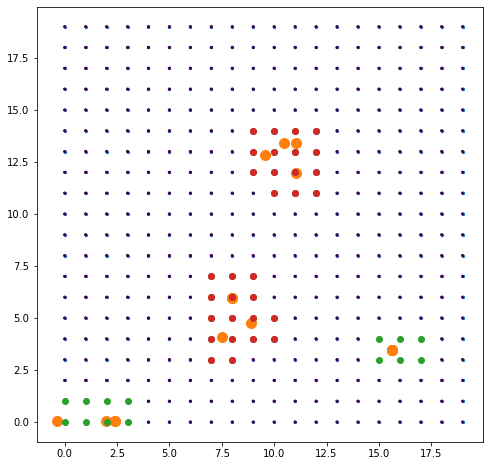

In [82]:
plt.scatter(grid[0], grid[1], s=5)
plt.scatter(grid[0], grid[1], s=5, c=labels_cleaned)
plt.scatter(crds[:, 0], crds[:, 1], s=100)
plt.scatter(crd_around[:, 0], crd_around[:, 1])
# # plt.scatter(crd_around[:, 0], crd_around[:, 1], c=labels)
plt.scatter(crd_around_cleaned[:, 0], crd_around_cleaned[:, 1])
# plt.gca().set_box_aspect(1)
plt.gcf().set_size_inches(8, 8)


In [85]:
labels_ = torch.randint(2, (3,3))
labels_

tensor([[0, 1, 1],
        [0, 1, 1],
        [1, 1, 0]])

In [86]:
labels_ = labels_.view(-1) + 3

tensor([0, 1, 1, 0, 1, 1, 1, 1, 0])